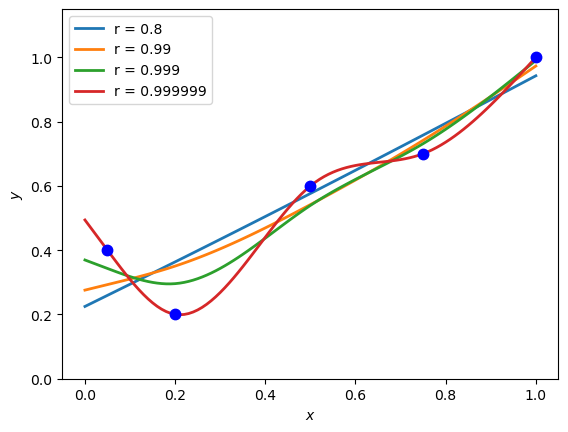

In [9]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([[0.05, 0.2, 0.5, 0.75, 1.]]).T
y = np.array([[0.4, 0.2, 0.6, 0.7, 1.]]).T
n = x.shape[0]
rr = [0.8, 0.99, 0.999, 0.999999]
for i in range(4):
    r = rr[i]
    ngamma = (1-r)/r

    k = lambda x1, x2 : (1/2)* np.max((x1,x2)) * np.min((x1,x2)) ** 2 - ((1/6)* np.min((x1,x2))**3)

    K = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            K[i,j] = k(x[i], x[j])
        
    Q = np.hstack((np.ones((n,1)), x))
    m1 = np.hstack((K @ K.T + (ngamma * K), K @ Q))
    m2 = np.hstack((Q.T @ K.T, Q.T @ Q))
    M = np.vstack((m1,m2))
    c = np.vstack((K, Q.T)) @ y
    ad = np.linalg.solve(M,c)

    # plot the curve
    xx = np.arange(0,1+0.01,0.01).reshape(-1,1)
    g = np.zeros_like(xx)
    Qx = np.hstack((np.ones_like(xx), xx))
    g = np.zeros_like(xx)
    N = np.shape(xx)[0]
    Kx = np.zeros((n,N))
    for i in range(n):
        for j in range(N):
            Kx[i,j] = k(x[i], xx[j])

    g = g + np.hstack((Kx.T, Qx)) @ ad
    plt.plot(xx, g, label = 'r = {}'.format(r), linewidth = 2)

plt.ylim((0,1.15))
plt.plot(x,y, 'b.', markersize=15)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.savefig("smooth_spline.png")
plt.show()